# Regressão Linear Simples e Multipla com Statsmodel
Mba em Ciência de dados

aluno:Joel Campos Teixeira

## Passo 1- Importar bibliotecas e coletar os dados

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [64]:
# a regressão linear simples mostrara a relação entre a quantidade de horas estudadas e a nota recebida na prova
# a regressão linear simples mostrara a relação entre a quantidade de horas estudadas , a quantidade de horas dormidas e a nota recebida na prova

In [66]:
num_amostras = 50 # numeros de amostras
random_seed = 42 # numero base para semente de reprodutividade de numeros

# Gerar os dados 
np.random.seed=random_seed
horas = (np.random.rand(num_amostras,1)*20).round(1) # criando a variavel independente
notas = 3 * horas.squeeze() + np.random.randn(num_amostras)* 3 # criando a varialve dependente com ruído
notas = (10*(notas-min(notas))/(max(notas)-min(notas))).round(1)

# criando o dataframe

dad= pd.DataFrame({'horas_estudadas':horas.squeeze(),'notas': notas})

In [68]:
# visualisar o dataframe
dad.head()

,horas_estudadas,notas
0,15.5,7.6
1,11.2,5.6
2,0.9,0.6
3,11.4,5.3
4,4.4,2.5


## Passo 2 Visualizar os Dados

Text(0, 0.5, 'notas')

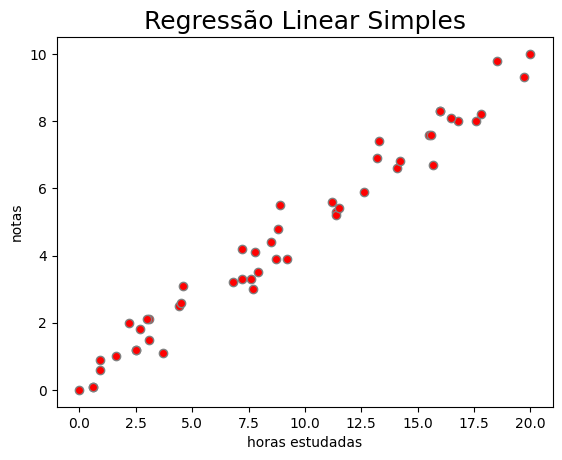

In [72]:
# criação grafico de dispersão horas x notas

plt.scatter(dad['horas_estudadas'],dad['notas'],color='red',edgecolor='gray')
plt.title('Regressão Linear Simples',fontsize=18)
plt.xlabel('horas estudadas')
plt.ylabel('notas')

## Passo 3 Apos a AED ajustar o modelo

In [73]:
# Adicionar uma constante(intercepto) no modelo
X=sm.add_constant(dad['horas_estudadas'])

#Ajustar o modelo de regressão linear simples
modelo = sm.OLS(dad['notas'],X).fit()

#Exibe o resumo do modelo

print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                  notas   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     1708.
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           3.53e-39
Time:                        11:00:10   Log-Likelihood:                -32.991
No. Observations:                  50   AIC:                             69.98
Df Residuals:                      48   BIC:                             73.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2033      0.124     

## Passo 5 Visualizar o modelo ajustado

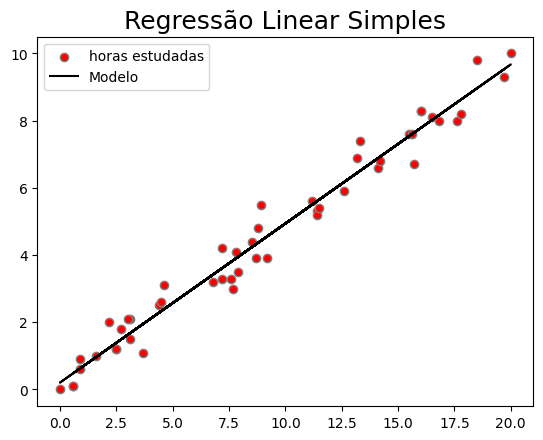

In [75]:
# criação grafico de dispersão horas x notas

plt.scatter(dad['horas_estudadas'],dad['notas'],color='red',edgecolor='gray',label='horas estudadas')
plt.plot(dad['horas_estudadas'],modelo.fittedvalues,color='black',label='Modelo')
plt.title('Regressão Linear Simples',fontsize=18)
plt.legend()

# Regressão Linear Multipla

Passo 1 Criando os dados

In [79]:
num_amostras = 50 # numeros de amostras
random_seed = 42 # numero base para semente de reprodutividade de numeros

# Gerar os dados 
np.random.seed=random_seed
horas = (np.random.rand(num_amostras,1)*20).round(1) # criando a variavel independente
#Inserindo variavel sono
sono = (np.random.rand(num_amostras,1)*15).round(1) # variavel depedente 2 sono
notas = 3 * horas.squeeze() + 2* sono.squeeze()+ 5 * np.random.randn(num_amostras) # criando a varialve dependente com ruído
notas = (10*(notas-min(notas))/(max(notas)-min(notas))).round(1)

# criando o dataframe

data= pd.DataFrame({'horas_estudadas':horas.squeeze(),'horas_sono':sono.squeeze(),'notas': notas})

#visualizar o dataframe
data.head()

,horas_estudadas,horas_sono,notas
0,10.2,6.8,4.3
1,0.9,8.3,1.3
2,10.1,5.7,4.4
3,1.5,13.5,2.9
4,19.7,12.5,10.0


## Passo 2 visualizar os dados e AED

In [78]:
# grafico de dispersão para cada variavel independente

Text(0.5, 1.0, 'horas de sono x notas')

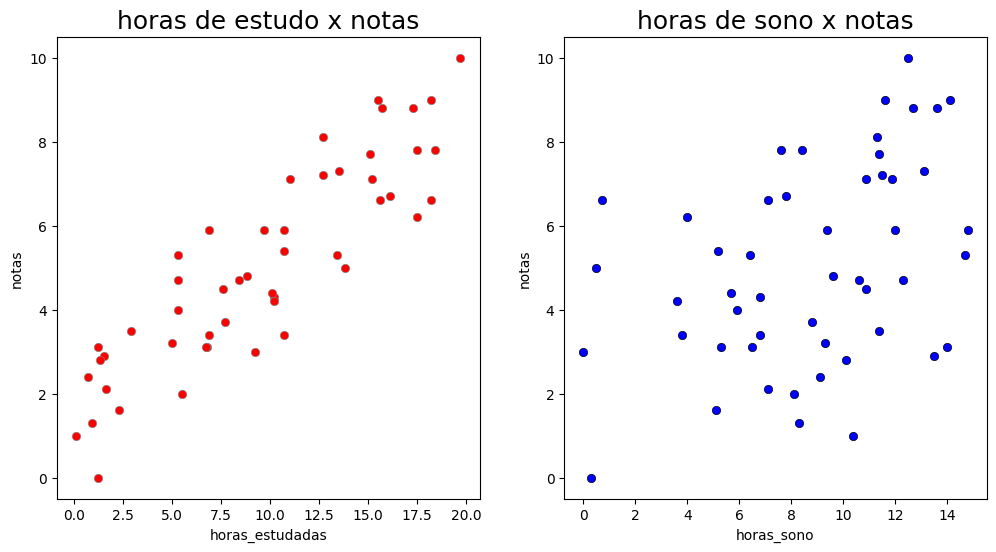

In [86]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(data=data,x=data['horas_estudadas'],y=data.notas, edgecolor='gray',color='red')
plt.title('horas de estudo x notas',fontsize=18,color='black')
plt.subplot(1,2,2)
sns.scatterplot(data=data,x=data['horas_sono'],y= data.notas,edgecolor='black',color='blue')
plt.title('horas de sono x notas',fontsize=18,color='black')

## Passo 3 ajustar o modelo

In [92]:
# Adicionar a constante(intercepto) ao modelo
X = data[['horas_estudadas','horas_sono']] # Aqui foi criado  os dois atributos para o modelo
X = sm.add_constant(X) # Aqui adiciona ao modelo

# Ajustar o modelo de regressão Multipla
modelo = sm.OLS(data['notas'],X).fit()

# Exibe o resumo sumario do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  notas   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     445.6
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           2.79e-31
Time:                        11:37:30   Log-Likelihood:                -39.110
No. Observations:                  50   AIC:                             84.22
Df Residuals:                      47   BIC:                             89.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.6972      0.232     

## Passo 4- Visualizar o modelo ajustado

In [102]:
# Adicionado os Valores preditos pelo modelo ao dataframe
data['nota_predita'] = modelo.fittedvalues

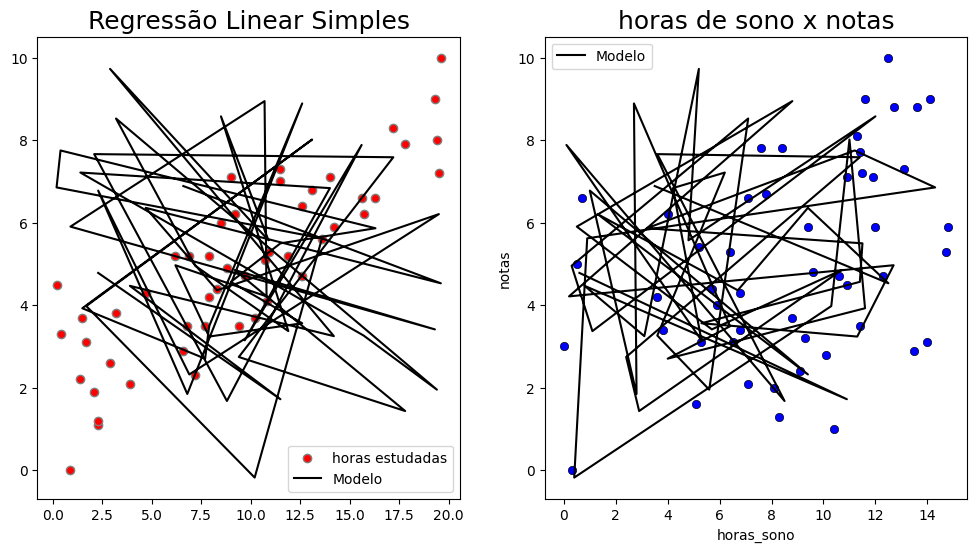

In [129]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.scatter(dad['horas_estudadas'],dad['notas'],color='red',edgecolor='gray',label='horas estudadas')
plt.plot(dad['horas_estudadas'],modelo.fittedvalues,color='black',label='Modelo')
plt.title('Regressão Linear Simples',fontsize=18)
plt.legend()

plt.subplot(1,2,2)
sns.scatterplot(data=data,x=data['horas_sono'],y= data.notas,edgecolor='black',color='blue')
plt.plot(dad['horas_sono'],modelo.fittedvalues,color='black',label='Modelo')
plt.title('horas de sono x notas',fontsize=18,color='black')
plt.legend()